In [56]:
#Initial Commit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Gather Data

In [57]:
df_income = pd.read_csv("../Income-Elasticity-Analysis/Data/County_Incomes.csv")
# drop instances without states
df_income = df_income.drop([0, 1, 2, 3, 4, 3222, 3223, 3224, 3225, 3226], inplace = False)
df_income.rename({
    'Table 1. Per Capita Personal Income, by County, 2019–2021' : 'State_Name',
    'Unnamed: 1': 'Income_2019',
    'Unnamed: 2': 'Income_2020',
    'Unnamed: 3': 'Income_2021',
    'Unnamed: 5': 'Percent_Change_2020',
    'Unnamed: 6': 'Percent_Change_2021',
},
axis=1, inplace = True)
df_income = df_income.drop(columns = ['Unnamed: 4', 'Unnamed: 7', 'Unnamed: 8'])
df_income = df_income.dropna()
df_income.head(10)

,State_Name,Income_2019,Income_2020,Income_2021,Percent_Change_2020,Percent_Change_2021
5,Alabama,"43,288","46,179","49,769",6.7,7.8
6,Autauga,"42,846","45,248","48,347",5.6,6.8
7,Baldwin,"48,380","51,348","54,659",6.1,6.4
8,Barbour,"34,870","37,120","40,428",6.5,8.9
9,Bibb,"31,800","34,598","36,892",8.8,6.6
10,Blount,"36,542","38,351","42,634",5.0,11.2
11,Bullock,"27,192","30,429","33,267",11.9,9.3
12,Butler,"39,254","41,151","46,050",4.8,11.9
13,Calhoun,"36,869","39,546","42,621",7.3,7.8
14,Chambers,"33,682","36,299","39,728",7.8,9.4


## Clear Data
Create large pandas dataframe with all values aligned

In [58]:
df_19_expenditure = pd.read_csv("../Income-Elasticity-Analysis/Data/County_Expenditure_2019.csv")
# determine states (need to be deleted from df_income)
states = df_19_expenditure.State_Name.unique()
#format df_19 dataset

    
df_19 = df_19_expenditure.drop(['Year', 'State_ID', 'County_ID'], axis='columns')
df_19.dropna()
df_19.head()

,State_Name,County_Name,Per_Capita_Exp_ESRD,Avg_Risk_Score_ESRD,Person_Years_ESRD,Per_Capita_Exp_DIS,Avg_Risk_Score_DIS,Person_Years_DIS,Per_Capita_Exp_AGDU,Avg_Risk_Score_AGDU,Person_Years_AGDU,Per_Capita_Exp_AGND,Avg_Risk_Score_AGND,Person_Years_AGND
0,Alabama,Autauga,66611.56,0.97663,53.42,8762.86,0.90771,655.33,16055.85,0.91544,137.83,9748.79,1.0504,3211.08
1,Alabama,Baldwin,72568.96,0.94706,125.33,9378.34,0.92099,2153.42,17998.02,0.97261,612.67,9920.69,1.00548,19216.42
2,Alabama,Barbour,66633.41,0.93223,58.67,10113.14,0.93158,532.08,15522.02,0.81495,320.92,9821.2,0.97511,1783
3,Alabama,Bibb,89143.8,1.00065,27.33,9832.05,0.91855,457.5,15064.04,0.96091,196.08,10164.09,1.09076,1038
4,Alabama,Blount,75799.15,0.9148,33.25,9143.62,0.86066,725.92,16590.76,0.86799,243.33,10873.38,1.0453,3254.58


In [59]:
# drop the states from df_income dataset
for state in states:
    df_income = df_income.drop(df_income.loc[(df_income.State_Name == state)].index)

df_income.rename({
    'State_Name': 'County_Name'
}, axis=1, inplace = True)
df_income.head()

,County_Name,Income_2019,Income_2020,Income_2021,Percent_Change_2020,Percent_Change_2021
6,Autauga,"42,846","45,248","48,347",5.6,6.8
7,Baldwin,"48,380","51,348","54,659",6.1,6.4
8,Barbour,"34,870","37,120","40,428",6.5,8.9
9,Bibb,"31,800","34,598","36,892",8.8,6.6
10,Blount,"36,542","38,351","42,634",5.0,11.2


In [60]:
# the following shows that the dataframes don't have all the same counties
arr_df_income_counties = []
for county in df_income.County_Name:
    arr_df_income_counties.append(county)
print (len(arr_df_income_counties))

arr_df_19_counties = []
for county in df_19.County_Name:
    arr_df_19_counties.append(county)
print (len(arr_df_19_counties))

3055
3218


In [61]:
# delete counties in df income dataset and not in the 19 dataset
# note some of these counties might be named diffenrtly, however, they are still removed for our purposes
for county in arr_df_income_counties:
    if county not in arr_df_19_counties:
        df_income = df_income.drop(df_income.loc[(df_income.County_Name == county)].index)

print(len(df_income))


2987


In [62]:
# delete counties in 19 dataset and not in the df income dataset
# the same problems lies as slightly differnt names can refer to the same dataset
for county in df_19.County_Name:
    if county not in arr_df_income_counties:
        df_19 = df_19.drop(df_19.loc[(df_19.County_Name == county)].index)
print(len(df_19))

2998


In [63]:
arr_df_income_counties_2 = []
for county in df_income.County_Name:
    arr_df_income_counties_2.append(county)
print (len(arr_df_income_counties_2))

arr_df_19_counties_2 = []
for county in df_19.County_Name:
    arr_df_19_counties_2.append(county)
print (len(arr_df_19_counties_2))

2987
2998


In [64]:
df_income = df_income.reset_index()
df_19 = df_19.reset_index()
df_19.head(75)

,index,State_Name,County_Name,Per_Capita_Exp_ESRD,Avg_Risk_Score_ESRD,Person_Years_ESRD,Per_Capita_Exp_DIS,Avg_Risk_Score_DIS,Person_Years_DIS,Per_Capita_Exp_AGDU,Avg_Risk_Score_AGDU,Person_Years_AGDU,Per_Capita_Exp_AGND,Avg_Risk_Score_AGND,Person_Years_AGND
0,0,Alabama,Autauga,66611.56,0.97663,53.42,8762.86,0.90771,655.33,16055.85,0.91544,137.83,9748.79,1.0504,3211.08
1,1,Alabama,Baldwin,72568.96,0.94706,125.33,9378.34,0.92099,2153.42,17998.02,0.97261,612.67,9920.69,1.00548,19216.42
2,2,Alabama,Barbour,66633.41,0.93223,58.67,10113.14,0.93158,532.08,15522.02,0.81495,320.92,9821.2,0.97511,1783
3,3,Alabama,Bibb,89143.8,1.00065,27.33,9832.05,0.91855,457.5,15064.04,0.96091,196.08,10164.09,1.09076,1038
4,4,Alabama,Blount,75799.15,0.9148,33.25,9143.62,0.86066,725.92,16590.76,0.86799,243.33,10873.38,1.0453,3254.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,93,Arizona,Gila,75069.55,0.93608,104.42,10384.88,0.92858,670.67,20752.6,0.88058,435.08,9875.54,0.92975,7850.17
71,94,Arizona,Graham,74946.81,0.98057,30.67,10180.31,0.81566,269.92,13250.29,0.83332,187.5,9541.71,0.87782,1892.33
72,95,Arizona,Greenlee,*,*,*,7710.17,0.85198,87.67,13400.07,0.85874,32.67,9881.86,0.91099,621.67
73,96,Arizona,La Paz,81554.89,0.95762,34.67,12701.78,1.02104,246.75,20497.9,0.92595,194.42,10506.74,0.98207,2397.83


In [65]:
some_arr = []
for i in range(2975):
    if i < 2980 and df_19.loc[i, 'County_Name'] != df_income.loc[i, 'County_Name']: 
        if df_19.loc[(i + 1), 'County_Name'] == df_income.loc[i, 'County_Name']:
            some_arr.append(df_19.loc[i, 'County_Name'])
            df_19 = df_19.drop(i)
            df_19 = df_19.reset_index(drop=True)
df_income = df_income.drop(2788)

len(some_arr)

12

In [66]:
df_income.reset_index(inplace=True, drop=True)
df_19.reset_index(inplace=True, drop=True)
df = pd.concat([df_income, df_19], axis=1)
df.drop(df.iloc[:, 7:10], inplace=True, axis=1)
df.drop(['Income_2021', 'Percent_Change_2021'], inplace=True, axis=1)

df.tail(10)

,Income_2019,Income_2020,Percent_Change_2020,Per_Capita_Exp_ESRD,Avg_Risk_Score_ESRD,Person_Years_ESRD,Per_Capita_Exp_DIS,Avg_Risk_Score_DIS,Person_Years_DIS,Per_Capita_Exp_AGDU,Avg_Risk_Score_AGDU,Person_Years_AGDU,Per_Capita_Exp_AGND,Avg_Risk_Score_AGND,Person_Years_AGND
2976,"45,633","50,469",10.6,.,.,.,13969.63,0.77958,46.08,23565.9,0.94153,27.92,12097.62,0.85766,381
2977,"60,645","62,495",3.1,73611.92,0.91396,17.58,11782.58,0.85022,437,17711.39,0.98919,249.17,10269.03,0.90784,4602
2978,"51,705","51,050",-1.3,*,*,*,14478.23,1.03345,138.33,18827.62,0.88059,85.58,12045.21,0.89701,1406.25
2979,"59,932","61,749",3.0,88523.94,0.90113,15.58,12345.53,0.97777,306.92,17698.4,1.03609,199.33,9888.12,0.91563,3069.92
2980,"61,618","62,780",1.9,*,*,*,15709.59,1.01667,71.25,20442.97,1.1311,29.42,10813.88,0.81569,867.83
2981,"56,619","55,188",-2.5,63524.44,0.96476,34.25,12747.25,0.97671,559.67,18099.26,1.12594,173.58,9367.95,0.93255,3249.58
2982,"278,682","290,674",4.3,*,*,*,16710.01,0.91208,79.33,9218.14,0.80076,42.83,9524.82,0.76653,2321.75
2983,"41,297","42,704",3.4,93303.15,1.03328,10.67,12500.3,0.98271,334,19923.04,1.1104,118.33,8664.77,0.85119,1583.17
2984,"51,388","57,228",11.4,*,*,*,11930.18,0.85223,137.92,18603.9,0.94646,83.33,12454.46,0.88656,1192.5
2985,"46,281","47,499",2.6,*,*,*,12068.92,0.80042,115.08,15456.4,1.00307,68.92,11089.92,0.86812,910.67


In [67]:
df.to_csv("../Income-Elasticity-Analysis/Data/Income_df - Sheet1.csv", sep=',', index=False, encoding='utf-8')

## Explore Data
Determine which variables impact the percent economic change

In [68]:
df.Percent_Change_2020.dropna()

0        5.6
1        6.1
2        6.5
3        8.8
4        5.0
        ... 
2981    -2.5
2982     4.3
2983     3.4
2984    11.4
2985     2.6
Name: Percent_Change_2020, Length: 2986, dtype: object

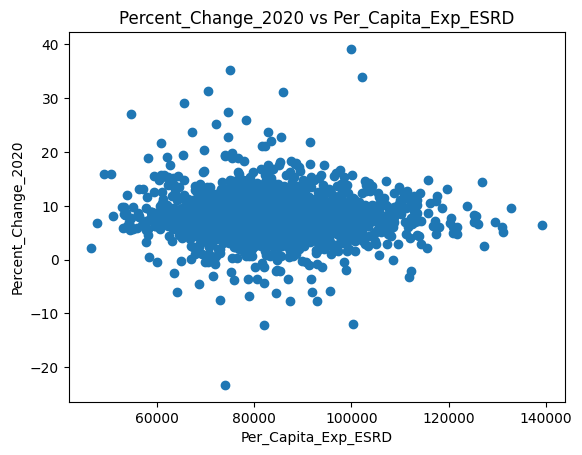

In [69]:
#impact of per capita expenditure on End Stage Renal Disease
df_per_capita_exp_ESRD = df.copy()
# remove asticks
for i in range(len(df_per_capita_exp_ESRD)):
    if df_per_capita_exp_ESRD.loc[i, 'Per_Capita_Exp_ESRD'] == '*' or df_per_capita_exp_ESRD.loc[i, 'Per_Capita_Exp_ESRD'] == '.':
        df_per_capita_exp_ESRD = df_per_capita_exp_ESRD.drop(i)
lst_percent_changes = []
for val in df_per_capita_exp_ESRD.Percent_Change_2020:
    lst_percent_changes.append(float(val))

y = np.array(lst_percent_changes)
lst_vals = []
for val in df_per_capita_exp_ESRD.Per_Capita_Exp_ESRD:
    lst_vals.append(float(val))
x = np.array(lst_vals)
plt.scatter(x, y)
plt.title('Percent_Change_2020 vs Per_Capita_Exp_ESRD')
plt.xlabel('Per_Capita_Exp_ESRD')
plt.ylabel('Percent_Change_2020')
plt.show()

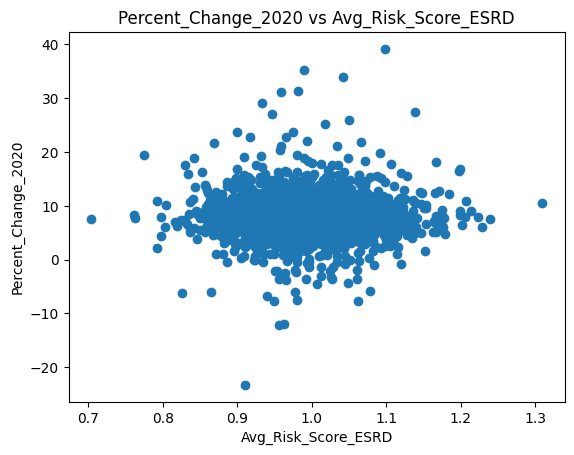

In [70]:
#impact of average risk score of End Stage Renal Disease
df_Avg_Risk_Score_ESRD = df.copy()
# remove asticks
for i in range(len(df_Avg_Risk_Score_ESRD)):
    if df_Avg_Risk_Score_ESRD.loc[i, 'Avg_Risk_Score_ESRD'] == '*' or df_Avg_Risk_Score_ESRD.loc[i, 'Per_Capita_Exp_ESRD'] == '.':
        df_Avg_Risk_Score_ESRD = df_Avg_Risk_Score_ESRD.drop(i)
lst_percent_changes = []
for val in df_Avg_Risk_Score_ESRD.Percent_Change_2020:
    lst_percent_changes.append(float(val))

y = np.array(lst_percent_changes)
lst_vals = []
for val in df_Avg_Risk_Score_ESRD.Avg_Risk_Score_ESRD:
    lst_vals.append(float(val))
x = np.array(lst_vals)
plt.scatter(x, y)
plt.title('Percent_Change_2020 vs Avg_Risk_Score_ESRD')
plt.xlabel('Avg_Risk_Score_ESRD')
plt.ylabel('Percent_Change_2020')
plt.show()

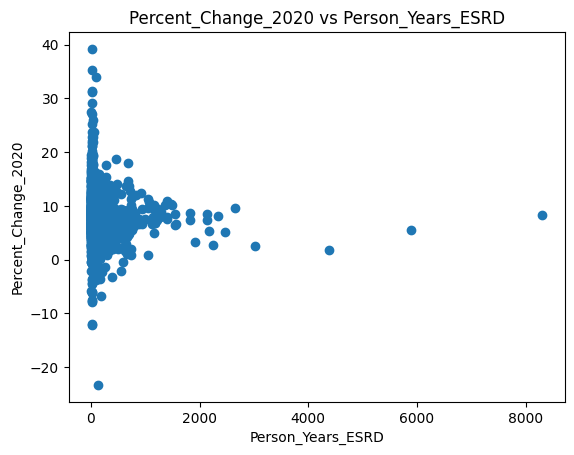

In [73]:
#impact of total age of individuals with End Stage Renal Disease
df_Person_Years_ESRD = df.copy()
# remove asticks
for i in range(len(df_Person_Years_ESRD)):
    if df_Person_Years_ESRD.loc[i, 'Person_Years_ESRD'] == '*' or df_Person_Years_ESRD.loc[i, 'Person_Years_ESRD'] == '.':
        df_Person_Years_ESRD = df_Person_Years_ESRD.drop(i)
lst_percent_changes = []
for val in df_Person_Years_ESRD.Percent_Change_2020:
    lst_percent_changes.append(float(val))

y = np.array(lst_percent_changes)
lst_vals = []
for val in df_Person_Years_ESRD.Person_Years_ESRD:
    lst_vals.append(float(val))
x = np.array(lst_vals)
plt.scatter(x, y)
plt.title('Percent_Change_2020 vs Person_Years_ESRD')
plt.xlabel('Person_Years_ESRD')
plt.ylabel('Percent_Change_2020')
plt.show()

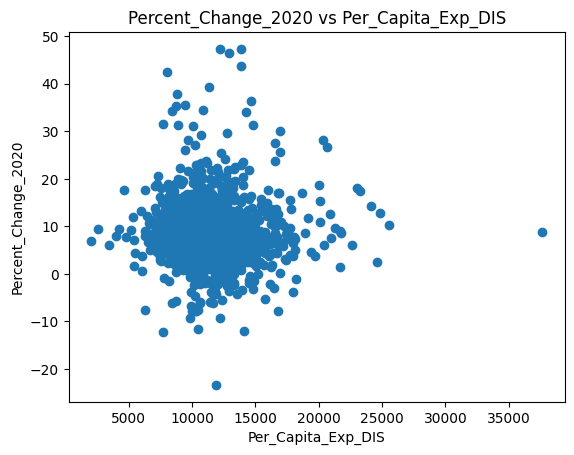

In [74]:
#impact of per capita expenditure by expenditure on dissabilities
df_Per_Capita_Exp_DIS = df.copy()
# remove asticks
for i in range(len(df_Per_Capita_Exp_DIS)):
    if df_Per_Capita_Exp_DIS.loc[i, 'Per_Capita_Exp_DIS'] == '*' or df_Per_Capita_Exp_DIS.loc[i, 'Per_Capita_Exp_DIS'] == '.':
        df_Per_Capita_Exp_DIS = df_Per_Capita_Exp_DIS.drop(i)
lst_percent_changes = []
for val in df_Per_Capita_Exp_DIS.Percent_Change_2020:
    lst_percent_changes.append(float(val))

y = np.array(lst_percent_changes)
lst_vals = []
for val in df_Per_Capita_Exp_DIS.Per_Capita_Exp_DIS:
    lst_vals.append(float(val))
x = np.array(lst_vals)
plt.scatter(x, y)
plt.title('Percent_Change_2020 vs Per_Capita_Exp_DIS')
plt.xlabel('Per_Capita_Exp_DIS')
plt.ylabel('Percent_Change_2020')
plt.show()

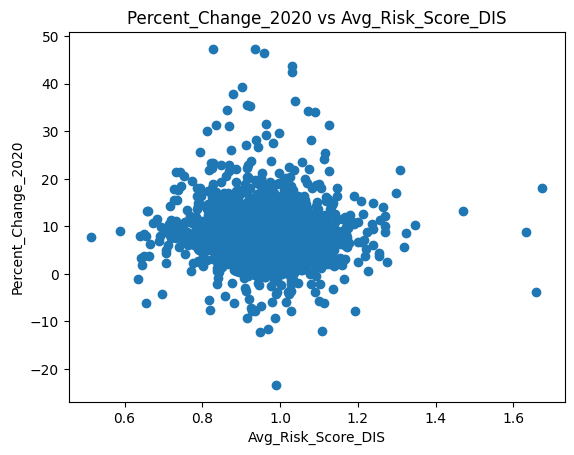

In [75]:
#impact of average risk score of dissabilities
df_Avg_Risk_Score_DIS = df.copy()
# remove asticks
for i in range(len(df_Avg_Risk_Score_DIS)):
    if df_Avg_Risk_Score_DIS.loc[i, 'Avg_Risk_Score_DIS'] == '*' or df_Avg_Risk_Score_DIS.loc[i, 'Avg_Risk_Score_DIS'] == '.':
        df_Avg_Risk_Score_DIS = df_Avg_Risk_Score_DIS.drop(i)
lst_percent_changes = []
for val in df_Avg_Risk_Score_DIS.Percent_Change_2020:
    lst_percent_changes.append(float(val))

y = np.array(lst_percent_changes)
lst_vals = []
for val in df_Avg_Risk_Score_DIS.Avg_Risk_Score_DIS:
    lst_vals.append(float(val))
x = np.array(lst_vals)
plt.scatter(x, y)
plt.title('Percent_Change_2020 vs Avg_Risk_Score_DIS')
plt.xlabel('Avg_Risk_Score_DIS')
plt.ylabel('Percent_Change_2020')
plt.show()

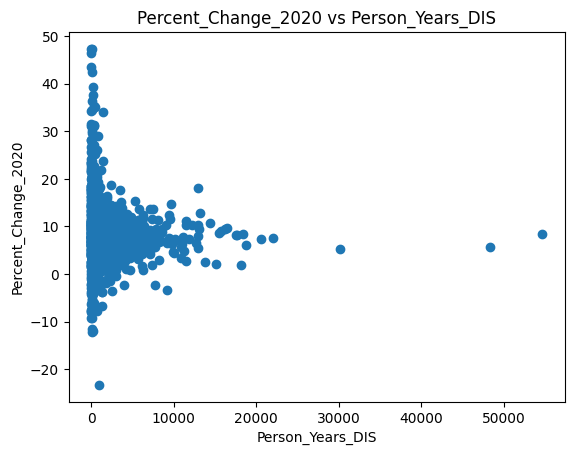

In [76]:
#impact of total age of individuals with dissabilities
df_Person_Years_DIS = df.copy()
# remove asticks
for i in range(len(df_Person_Years_DIS)):
    if df_Person_Years_DIS.loc[i, 'Person_Years_DIS'] == '*' or df_Person_Years_DIS.loc[i, 'Person_Years_DIS'] == '.':
        df_Person_Years_DIS = df_Person_Years_DIS.drop(i)
lst_percent_changes = []
for val in df_Person_Years_DIS.Percent_Change_2020:
    lst_percent_changes.append(float(val))

y = np.array(lst_percent_changes)
lst_vals = []
for val in df_Person_Years_DIS.Person_Years_DIS:
    lst_vals.append(float(val))
x = np.array(lst_vals)
plt.scatter(x, y)
plt.title('Percent_Change_2020 vs Person_Years_DIS')
plt.xlabel('Person_Years_DIS')
plt.ylabel('Percent_Change_2020')
plt.show()